# List 3

## Exercise 1

In [1]:
%matplotlib inline

In [2]:
import random as rnd
import warnings
import networkx as nx
import pydot
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import scipy
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KernelDensity
from scipy.special import binom
from math import factorial
from scipy.stats import poisson
from collections import OrderedDict
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")

In [3]:
from networkx.drawing.nx_pydot import write_dot, read_dot

### Function for frequency plot

In [4]:
def frequency_plot(graph, bins = 20, xlog = False):
    """
    Function draws a frequency plot (histogram) of node's degrees of a given graph
    
    Key arguments:
    graph -- networkx graph object 
    bins -- number of bins of histogram (int)
    xlog -- (boolean) if set to True, shows histogram with logarithmic scale on axis X, normal axis otherwise
    
    Function does not return anything
    """
    degrees = dict(graph.degree())
    list_of_degrees = degrees.values()
    fig, ax = plt.subplots()
    unique_bins = set(list_of_degrees)
    if xlog == True:
        plt.hist(list_of_degrees, bins, log = True)
    else:    
        plt.hist(list_of_degrees, bins,density = True)
    ax.set_xlabel('Degrees')
    ax.set_ylabel('Frequency of occurence')
    ax.set_title('Frequency plot of degrees')
    fig.tight_layout()
    plt.show()

### Random Graph

In [60]:
def random_graph_nx(N, p):
    """
    Function creates a random graph with a given parameters according to Edgar Gilbert's algorithm
    
    Key arguments:
    N -- number of nodes in the graph (integer)
    p -- probability of connection between each two nodes of the graph (float within [0, 1])
    
    Function returns networkx graph object
    """
    graph = nx.Graph()
    for i in range(1, N+1):
        graph.add_node(i)
    for j in range(1, N+1):
        for k in range(j+1, N+1):
            random_number = rnd.random()
            if random_number < p:
                graph.add_edge(j, k)
    return graph

In [61]:
N = 1100
p = 0.3
G = random_graph_nx(N, p)

In [62]:
G.number_of_nodes()

1100

In [63]:
G.number_of_edges()

181371

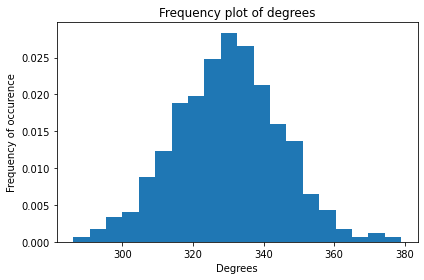

In [64]:
frequency_plot(G)

#### Average degree and variance of distribution

In [65]:
degrees = dict(G.degree())
kaver = sum(degrees.values())/len(G)
print("Average degree: ", round(kaver,3))

Average degree:  329.765


In [66]:
dgr = list(G.degree())
dgr_list = []
for i in dgr:
    dgr_list.append(i[1])
print("Variance of the degrees: ", np.round(np.var(dgr_list), 2))

Variance of the degrees:  223.15


In [ ]:
nx.draw_circular(G)

In [12]:
write_dot(G, "random_graph.dot")

### Binomial and Poisson

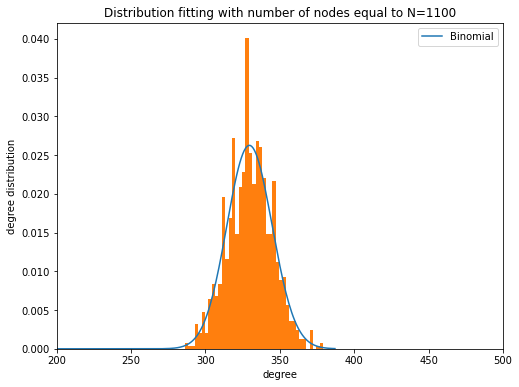

In [67]:
##Warning! Works only for a specified vlaue of N:
#Poisson up to N = 180
#Binomial up to N = 1150

kaver = int(p*(N-1))
kvals1 = np.arange(1, N+1)

degrees = dict(G.degree())
list_of_degrees = degrees.values()
unique_bins = set(list_of_degrees)

#poi1 = np.zeros(N, dtype=float)
bpoi1 = np.zeros(N, dtype=float)

#for k in np.arange(1,max(list_of_degrees)):
 #   ki = int(k)
  #  poi1[k-1] = np.exp(-kaver)*(kaver**ki)/((np.sqrt(2*np.pi*ki))*((ki/np.exp(1)))**ki)

pk1 = np.zeros(N,dtype=float)
for k in kvals1:
    pk1[k-1] = binom(N-1,k)*(p**k)*(1-p)**(N-1-k)
    

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111)

plt.plot(kvals1,pk1,label='Binomial')
#plt.plot(kvals1,poi1,'ro',label='Poisson')
plt.hist(list_of_degrees, int(len(unique_bins)*0.5), density = True)
plt.title("Distribution fitting with number of nodes equal to N={}".format(N))
plt.xlim(200,500)
plt.xlabel('degree')
plt.ylabel('degree distribution')
plt.legend()
plt.show()

## Watts-Strogatz Graph

In [68]:
def watts_strogatz(N, K, p):
    """
    Function creates Watts-Strogatz graph with a given parameters. At the start we have N nodes connected with K/2 neighbors
    on the left and K/2 neighbors on the right, and we rewire each edge of the node with a given probability
    
    Key arguments:
    N -- number of nodes (integer)
    K -- connections between a node and its closest neighbors on the left and right side, (even integer)
    p -- probability of rewiring the edge from one node to another (float within [0, 1])
    
    The function returns Watts-Strogatz graph as a networkx object
    """
    graph = nx.Graph()
    for i in range(1, N+1):
        graph.add_node(i)
    for j in range(1, N+1):
        for k in range(j+1, N+1):
            if abs(j-k)%(N - K/2) <= K/2:
                graph.add_edge(j, k)
    for i in graph.nodes():
        edges = list(graph.edges(i))
        directions = [i]
        for k in edges:
            directions.append(k[1])
        for m in edges:
            random_number = rnd.random()
            if random_number < p:
                graph.remove_edge(i, m[1])
                rewired = rnd.randint(1, N)
                while (rewired in directions):
                    rewired = rnd.randint(1, N)
                graph.add_edge(i, rewired)
                directions = [i]
                edg = list(graph.edges(i))
                for s in edg:
                    directions.append(s[1])
    return graph

In [100]:
N = 2000
K = 10
p = 0.5
watts = watts_strogatz(N, K, p)

In [ ]:
nx.draw_circular(watts, with_labels = True)

In [85]:
watts.number_of_nodes()

2000

In [86]:
watts.number_of_edges()

20000

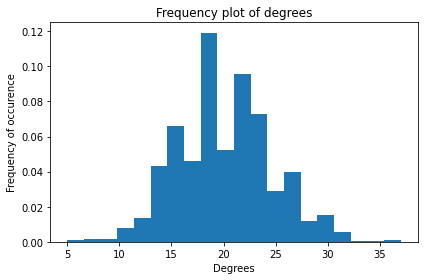

In [72]:
frequency_plot(watts)

### Average degree and variance of distribution


In [101]:
degrees_watts = dict(watts.degree())
kaver_watts = sum(degrees_watts.values())/len(watts)
print("Average degree: ", round(kaver_watts,3))

Average degree:  10.0


In [102]:
dgr_watts = list(watts.degree())
dgr_list_watts = []
for i in dgr_watts:
    dgr_list_watts.append(i[1])
print("Variance of the degrees for Watts-Strogatz graph: ", np.round(np.var(dgr_list_watts), 2))

Variance of the degrees for Watts-Strogatz graph:  7.22


In [78]:
write_dot(watts, "Watts-Strogatz_Graph.dot")

### Fitting degree distribution

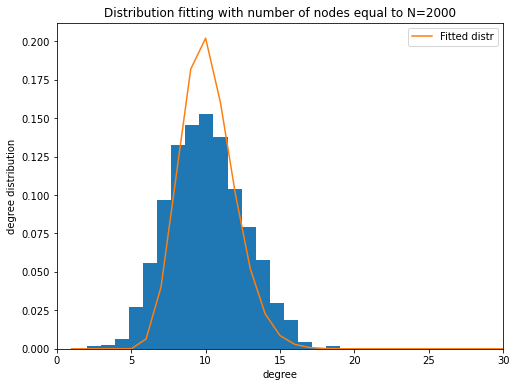

In [103]:
kvals = np.arange(1, N+1)
pk = np.zeros(N, dtype=float)

degrees = dict(watts.degree())
list_of_degrees = degrees.values()
unique_bins = set(list_of_degrees)


for k in kvals:
    ki = int(k)
    pk_sum = []    
    for n in range(0, int(min(k - K/2, K/2))):
        if k< 2*max(list_of_degrees):
            pk_sum.append(binom(K/2, n) * (1-p)**n * p**(K/2 - n) * ((p*K/2)**(k-n-K/2))/(factorial(k - n - K/2))*np.exp(-p*K/2)) 
        else:
            pk_sum.append(0)
    pk[k-1] = sum(pk_sum)

fig = plt.figure(figsize=(8,6))
#ax  = fig.add_subplot(111)

plt.hist(list_of_degrees, int(len(unique_bins)), density = True)
plt.plot(kvals, pk, label='Fitted distr')
plt.title("Distribution fitting with number of nodes equal to N={}".format(N))
plt.xlim(0, 3*K)
plt.xlabel('degree')
plt.ylabel('degree distribution')
plt.legend()
plt.show()


## Barabasi-Albert Graph

In [29]:
def barabasi_albert(m0, N, m):
    """
    Function creates Barabasi-Albert graph with the given parameters. At the start we have m0 linked nodes. At each time step 
    we add a node with m links to the existing network. The probability of connection to each of the nodes is proportional to
    the degree of the node.
    
    Key arguments:
    m0 -- Number of nodes at the beginning (integer)
    N -- Number of nodes added to the network (integer)
    m -- number of connections of each added node (integer, with condition: m < m0)
    
    Function returns Barabasi-Albert graph as a networkx object
    """
    graph = nx.Graph()
    for i in range(1, m0 + 1):
        graph.add_node(i)
    if m0==2:
        graph.add_edge(1, 2)
    else:
        for j in range(1, m0 + 1):
            random = rnd.randint(1, m0+1)
            while random == j or graph.has_edge(j, random):
                random = rnd.randint(1, m0+1)
            graph.add_edge(j, random)
    for k in range(m0 + 1, m0 + N + 1):
        ki = [graph.degree(i) for i in range(1, k)]
        den = sum(ki)
        graph.add_node(k)
        help_list = [0]
        for l in range(0,len(ki)):
            help_list.append((help_list[l] + ki[l]/den))
        connected = np.zeros(m)
        while (len(set(connected)) != len(connected)) or (0 in connected):
            for z in range(m): 
                random = rnd.random()
                for i in range(len(help_list)): 
                    if random < help_list[i]:
                        link = i
                        connected[z] = link
                        break
        for d in connected:
            graph.add_edge(k, d)

        
    return graph

In [54]:
m0 = 3
N = 1997
m = 2
ba = barabasi_albert(m0, N, m)

In [ ]:
#nx.draw(ba, with_labels = True)

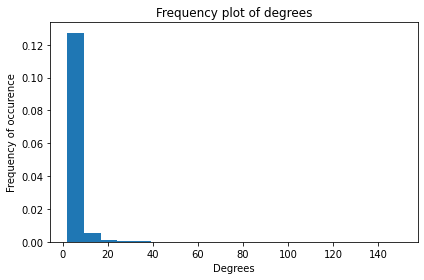

In [31]:
frequency_plot(ba)

### Number of nodes and  edges

In [32]:
ba.number_of_nodes()

2000

In [33]:
ba.number_of_edges()

3996

### Average degree and variance of distribution

In [55]:
degrees_ba = dict(ba.degree())
kaver_ba = sum(degrees_ba.values())/len(ba)
print("Average degree: ", kaver_ba)

Average degree:  3.996


In [56]:
dgr_ba = list(ba.degree())
dgr_list_ba = []
for i in dgr_ba:
    dgr_list_ba.append(i[1])
print("Variance of the degrees for Barabasi-Albert graph: ", np.round(np.var(dgr_list_ba), 2))

Variance of the degrees for Barabasi-Albert graph:  27.51


### Fitting degree distribution

The power law fitted to the distribution: f(x) = 9.05*(16.0*x)**-2.7


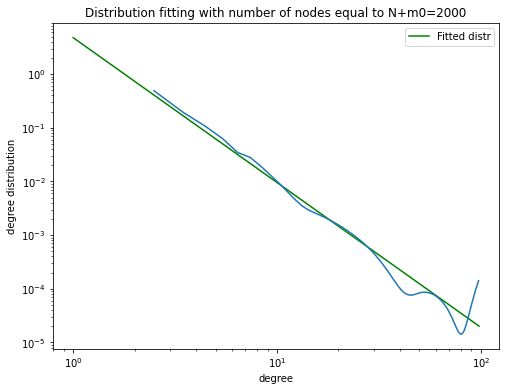

In [57]:
degrees = dict(ba.degree())
list_of_degrees = degrees.values()
log_degree=[]
for i in list_of_degrees:
    log_degree.append(np.log(i))
unique_bins = set(list_of_degrees)
kvals2 = np.arange(1, max(list_of_degrees) + 1)
  
n = max(list_of_degrees)
s = list(list_of_degrees)  
p, x = np.histogram(s, bins=n) 
x = x[:-1] + (x[1] - x[0])/2  
f = UnivariateSpline(x, p, s=n)
coef_k = (N+m0)*16/2000
vec_x = np.array(np.log(x)).reshape((-1, 1))
vec_y = np.array(np.log(abs(f(x))))
model = LinearRegression().fit(vec_x, vec_y)
b = model.intercept_
a = model.coef_
linr2 = np.zeros(max(list_of_degrees), dtype=float)        
for r in kvals2:
    linr2[r-1] = np.exp(a[0]*np.log(r*((N+m0)*16/2000))+b)
print("The power law fitted to the distribution: f(x) = {}*({}*x)**{}".format(round(b,2),round(coef_k,2),round(a[0],2)))
fig = plt.figure(figsize=(8,6))
plt.plot(kvals2, linr2, "g", label='Fitted distr')
plt.plot(x, f(x)/N)
plt.title("Distribution fitting with number of nodes equal to N+m0={}".format(N+m0))
plt.xscale("log")
plt.yscale("log")
#plt.xlim(2, 20)
#plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('degree distribution')
plt.legend()
plt.show()

In [58]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=kvals2, y=linr2,
                    mode='lines',
                    name='theoritical'))

fig.add_trace(go.Scatter(x=x, y=f(x)/N,
                    mode='lines',
                    name='empirical'))  
fig.update_layout(title = "Distribution fitting with number of nodes equal to N+m0={}".format(N+m0),xaxis_title ='degree', yaxis_title = 'degree distribution')
fig.show()

## Exercise 2

In [38]:
def scrap(node):
    """
    Function scraps, creates and returns a list of friends of a given user name, taken from the site  'www.livejournal.com'.
    
    Key arguments:
    node -- name of the user (string)
    
    Function returns the list of friends of the user
    """
    url = "https://www.livejournal.com/misc/fdata.bml?user="
    file = urllib.request.urlopen(url + node)
    friends = []
    for line in file:
        decoded_line = line.decode("utf-8")
        friends.append(decoded_line[2:-1])
    friends.pop(0)
    friends.pop(-1)
    return friends

In [39]:
def network(node, level = 1, write = False):
    """
    Function creates graph object with the nodes that are friends of a given user, and connections with them which are
    provided by the scrap function. The level argument defines the depth of search.
    
    Key arguments:
    node -- name of the user (string)
    level -- defines the depth of the search (integer, available values: 1, 2)
    write -- default value: False (not writing to dot file), if set to True - saves the graph to the dot file (Boolean)
    
    Function returns graph of a friends as a networkx object of a given user at the specified depth of search
    """
    VG = nx.Graph()
    initial_node = node
    VG.add_node(initial_node)
    friends = scrap(node)
    unique_friends = list(set(friends))
    for i in unique_friends:
        VG.add_node(i)
        VG.add_edge(initial_node, i)
        if level == 2:
            friends2 = scrap(i)
            unique_friends2 = list(set(friends2))
            if len(unique_friends2) == 1:
                VG.add_edge(i, j)
            else:
                for j in unique_friends2:
                    VG.add_edge(i, j)
    if write == True:
        write_dot(VG, "VG.txt")
    return VG

In [43]:
VG = network("valerois", 2)

In [40]:
VG2 = network("valerois")

### Number of nodes and edges in analysed network

In [44]:
VG.number_of_nodes()

131196

In [45]:
VG.number_of_edges()

310178

### Celebrities in our network

In [94]:
celebs = nx.degree_centrality(VG)
names = []
values = []
for k in sorted(celebs, key = celebs.get, reverse=True):
    names.append(k)
    values.append(celebs[k])
for i in range(0, 10):
    print(names[i],":", round(values[i],4))

alexpashkov : 0.0362
borisakunin : 0.0348
trirub : 0.0345
lara_x : 0.0336
no_globalism : 0.0335
gogol : 0.033
morena_morana : 0.0326
goodspider : 0.0322
timgud : 0.0314
serg_was : 0.0306


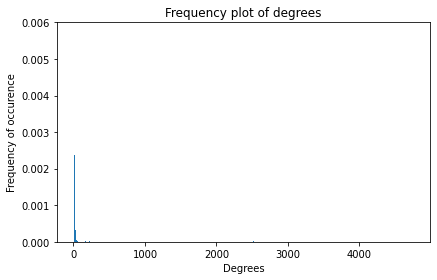

In [52]:
degrees = dict(VG.degree())
list_of_degrees = degrees.values()
fig, ax = plt.subplots()
unique_bins = set(list_of_degrees)
plt.hist(list_of_degrees, bins = max(list_of_degrees), density = True)
ax.set_xlabel('Degrees')
ax.set_ylabel('Frequency of occurence')
ax.set_title('Frequency plot of degrees')
fig.tight_layout()
plt.ylim(0,0.006)
plt.show()

In [50]:
VG_bc = nx.betweenness_centrality(VG2)
names = []
values = []
for k in sorted(VG_bc, key = VG_bc.get, reverse = True):
    names.append(k)
    values.append(VG_bc[k])
for i in range(0, 10):
    print(names[i],":", round(values[i], 3))

valerois : 1.0
zhabaevent : 0.0
babushonok : 0.0
lolagetty : 0.0
sass_hummel : 0.0
new_finder : 0.0
maleficente : 0.0
olganovikova : 0.0
gottfrid : 0.0
alinaf : 0.0
